<a href="https://colab.research.google.com/github/abhinandan6123/abhinandan6123/blob/main/Data_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING DATASETS

# Data Preprocessing for Delhivery Logistics Dataset

---
## Step 1: Import Requried Dataset
---

## Load the Dataset

Upload the file and  the raw dataset into a pandas DataFrame. We'll inspect the first few rows to understand the data structure.



In [ ]:

from google.colab import files
uploaded = files.upload()



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-db5beea28bfa>", line 2, in <cell line: 2>
    uploaded = files.upload()
  File "/usr/local/lib/python3.10/dist-packages/google/colab/files.py", line 72, in upload
    uploaded_files = _upload_files(multiple=True)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/files.py", line 172, in _upload_files
    result = _output.eval_js(
  File "/usr/local/lib/python3.10/dist-packages/google/colab/output/_js.py", line 40, in eval_js
    return _message.read_reply_from_input(request_id, timeout_sec)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_message.py", line 96, in read_reply_from_input
    time.sleep(0.025)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/


KeyboardInterrupt



IMPORTING LIBRARIES

# Data Preprocessing for Delhivery Logistics Dataset

---
## Step 2: Import Libraries


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


LOAD THE DATASET

## step 3 : Load the Dataset

Upload the file and load the raw dataset into a pandas DataFrame. We'll inspect the first few rows to understand the data structure.

In [ ]:
# Load the Excel file
data = pd.read_excel('delhivery.xlsx')

# Display basic information about the dataset & # Display the first few rows to understand the data structure

print(data.head())      # Preview the first few rows
print(data.info())      # Show column data types and non-null counts
print(data.isnull().sum())  # Check for missing values in each column

       data      trip_creation_time  \
0  training 2018-09-20 02:35:36.477   
1  training 2018-09-20 02:35:36.477   
2  training 2018-09-20 02:35:36.477   
3  training 2018-09-20 02:35:36.477   
4  training 2018-09-20 02:35:36.477   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4 

HANDLING MISSING VALUES

---

## Step 4: Handle Missing Values

We'll handle missing values by:
- Filling numeric missing values with the mean.
- Filling categorical missing values with the mode or a placeholder (e.g., 'missing').

This step ensures there are no gaps in the dataset.


In [ ]:
# Filling missing values in categorical columns
data['route_type'].fillna(data['route_type'].mode()[0], inplace=True)
data['trip_uuid'].fillna('missing_trip_uuid', inplace=True)
data['source_center'].fillna('missing_source_center', inplace=True)
data['source_name'].fillna('missing_source_name', inplace=True)
data['destination_center'].fillna('missing_destination_center', inplace=True)
data['destination_name'].fillna('missing_destination_name', inplace=True)

# Fill missing values in numeric columns with mean
numeric_columns = data.select_dtypes(include=['float64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Forward fill date columns if any missing values
date_columns = data.select_dtypes(include=['datetime64']).columns
data[date_columns] = data[date_columns].fillna(method='ffill')

# Verify missing values are handled
print(data.isnull().sum())

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64


<ipython-input-4-facf3c4e13d2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['route_type'].fillna(data['route_type'].mode()[0], inplace=True)
<ipython-input-4-facf3c4e13d2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

CORRECT DATA TYPES

---

## Step 5: Correct Data Types

Convert columns to the appropriate data types:
- Dates should be in `datetime` format.
- Categorical columns should be of `category` type.


In [ ]:
# Convert categorical columns to 'category' data type
categorical_columns = ['data', 'route_type', 'source_center', 'destination_center']
data[categorical_columns] = data[categorical_columns].astype('category')

# Check data types
print(data.dtypes)

data                                    category
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                              category
trip_uuid                                 object
source_center                           category
source_name                               object
destination_center                      category
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                float64
cutoff_factor                            float64
cutoff_timestamp                  datetime64[ns]
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

FEATURE ENGINEERING

---

## Step 6: Feature Engineering

Add useful features:
- **Trip Duration**: Calculate the trip duration by taking the difference between `od_start_time` and `od_end_time`.
- **Day of the Week** and **Month**: Extract the day of the week and month from `trip_creation_time`.


In [ ]:
# Calculate trip duration in minutes
data['trip_duration'] = (data['od_end_time'] - data['od_start_time']).dt.total_seconds() / 60

# Extract day of the week and month from trip creation time
data['trip_creation_day'] = data['trip_creation_time'].dt.day_name()
data['trip_creation_month'] = data['trip_creation_time'].dt.month

# Check new features
print(data[['trip_duration', 'trip_creation_day', 'trip_creation_month']].head())

   trip_duration trip_creation_day  trip_creation_month
0      86.213633          Thursday                    9
1      86.213633          Thursday                    9
2      86.213633          Thursday                    9
3      86.213633          Thursday                    9
4      86.213633          Thursday                    9


DETECT OUTLITERS
---

## Step 7: Detect and Handle Outliers (Optional)

To detect outliers, we can plot and identify unusual values in columns like `trip_duration`.


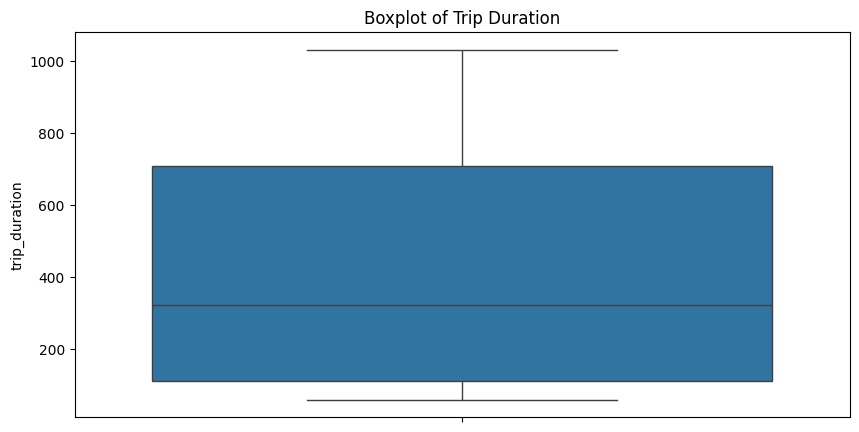

In [8]:
# Plotting trip duration to identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data['trip_duration'])
plt.title('Boxplot of Trip Duration')
plt.show()

# Optional: Filter or flag rows with outliers in trip_duration
# Example threshold (replace with appropriate value for your data)
# data = data[data['trip_duration'] < 1000]

NORMALIZE NUMERIC VALUES

---

## Step 8: Normalize Numeric Columns

We'll apply normalization to numeric columns using `MinMaxScaler` to scale values between 0 and 1. Alternatively, use `StandardScaler` if standardization (mean=0, std=1) is needed.


In [9]:
# Selecting columns for normalization
columns_to_normalize = ['trip_duration', 'actual_distance_to_destination', 'actual_time', 'osrm_distance']

# Applying MinMaxScaler to the selected columns
minmax_scaler = MinMaxScaler()
data[columns_to_normalize] = minmax_scaler.fit_transform(data[columns_to_normalize])

# Display the normalized data
data[columns_to_normalize].head()

,trip_duration,actual_distance_to_destination,actual_time,osrm_distance
0,0.026549,0.003108,0.006135,0.003793
1,0.026549,0.022745,0.018405,0.022038
2,0.026549,0.042842,0.038037,0.042258
3,0.026549,0.062431,0.065031,0.066604
4,0.026549,0.069980,0.072393,0.082787


STANDARDIZE COLUMN NAMES

---

## Step 9: Standardize Column Names

Standardize column names to follow a consistent snake_case format for easier analysis.


In [10]:
# Standardize column names to a consistent format
data.columns = [col.lower().replace(' ', '_') for col in data.columns]

SAVE THE CLEANED DATASET

---

## Step 10: Save the Cleaned and Normalized Dataset

Finally, we save the cleaned dataset as a CSV file for future analysis.


In [11]:
# Save the cleaned dataset to a CSV file
data.to_csv('cleaned_logistics_data.csv', index=False)

# Download the cleaned dataset to your local system
files.download('cleaned_logistics_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This notebook and code takes you through each step, from loading the dataset to saving the cleaned and normalized data. You can now analyze the data with confidence, knowing it's in a clean and consistent state!